## Task 2: Mushroom Classification – Project Overview

The goal of this project is to build and evaluate classification models that predict whether a mushroom is **edible** or **poisonous** based on its physical characteristics.

The dataset contains only **categorical features**, such as cap shape, gill color, odor, etc. This makes it ideal for testing classification algorithms and preprocessing techniques for categorical data.

In this notebook, we will:
1. Load and explore the dataset, including class distribution and unique values of key features.
2. Perform exploratory data analysis (EDA) using bar plots and correlation analysis (Cramér’s V).
3. Preprocess the data using appropriate encoders (OneHotEncoder or OrdinalEncoder).
4. Train and evaluate multiple classification models, including:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Naive Bayes
   - Gradient Boosting
5. Measure performance using accuracy, precision, recall, F1 score, and confusion matrix.
6. Visualize the most important features influencing classification.
7. Analyze model performance and draw conclusions about feature importance and potential improvements.

The ultimate goal is to identify reliable patterns that distinguish edible from poisonous mushrooms with high accuracy.


## Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

### 1. Data Loading and Initial Exploration

✅ Data loaded successfully.

Sample (first 5 rows):


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



📊 Dataset size: 8124 rows, 23 columns.

ℹ️ Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  st

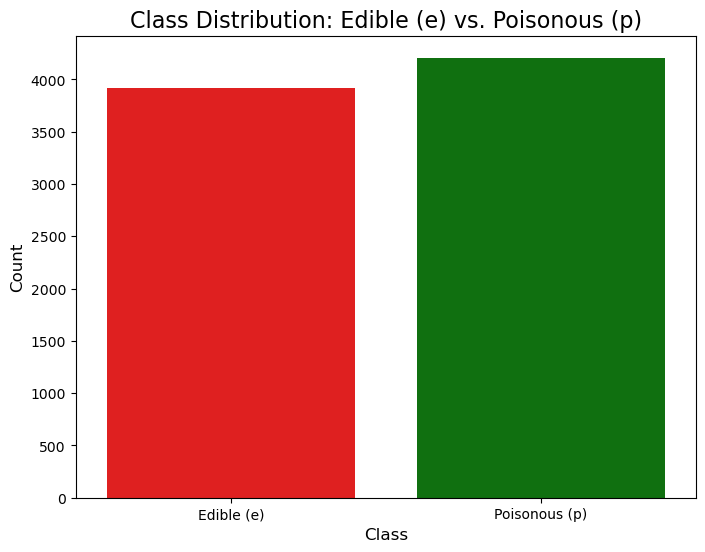


✅ Conclusion: The dataset is well-balanced. Edible and poisonous mushrooms are nearly equally represented.

--- Feature analysis: odor ---
Category frequencies:
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
Unique values:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

--- Feature analysis: gill-color ---
Category frequencies:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
Unique values:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

--- Feature analysis: cap-shape ---
Category frequencies:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
Unique values:
['x' 'b' 's' 'f' 'k' 'c']



In [5]:
# Path to the mushroom dataset file
data_path = 'agaricus-lepiota.data'

# Column names based on agaricus-lepiota.names
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset
try:
    df = pd.read_csv(data_path, header=None, names=column_names)
    print("✅ Data loaded successfully.\n")
    print("Sample (first 5 rows):")
    display(df.head())
except FileNotFoundError:
    print(f"❌ ERROR: File '{data_path}' not found. Please check the path.")

# Dataset size
print(f"\n📊 Dataset size: {df.shape[0]} rows, {df.shape[1]} columns.\n")

# Data types and non-null summary
print("ℹ️ Data types and non-null counts:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("\n⚠️ Missing values by column:")
    print(missing_values.sort_values(ascending=False))
else:
    print("\n✅ No missing values found in the dataset.")

# Analyze target variable: 'class'
class_distribution = df['class'].value_counts()
print("\n📈 Target variable 'class' distribution:")
print(class_distribution)

print("\n📋 Descriptive summary of 'class':")
print(df['class'].describe())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette={'p': 'red', 'e': 'green'}, hue='class')
plt.title('Class Distribution: Edible (e) vs. Poisonous (p)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Edible (e)', 'Poisonous (p)'])
plt.show()

print("\n✅ Conclusion: The dataset is well-balanced. Edible and poisonous mushrooms are nearly equally represented.\n")

# Frequency and unique values for selected features
for feature in ['odor', 'gill-color', 'cap-shape']:
    print(f"--- Feature analysis: {feature} ---")
    print("Category frequencies:")
    print(df[feature].value_counts())
    print("Unique values:")
    print(df[feature].unique())
    print()


### 2. Exploratory Data Analysis

Created 'df_readable' DataFrame with human-readable category names.
Sample of mapped data:


,class,odor,gill-color,spore-print-color,cap-shape
0,Poisonous,pungent,black,black,convex
1,Edible,almond,black,brown,convex
2,Edible,anise,brown,brown,bell
3,Poisonous,pungent,brown,black,convex
4,Edible,none,black,brown,convex


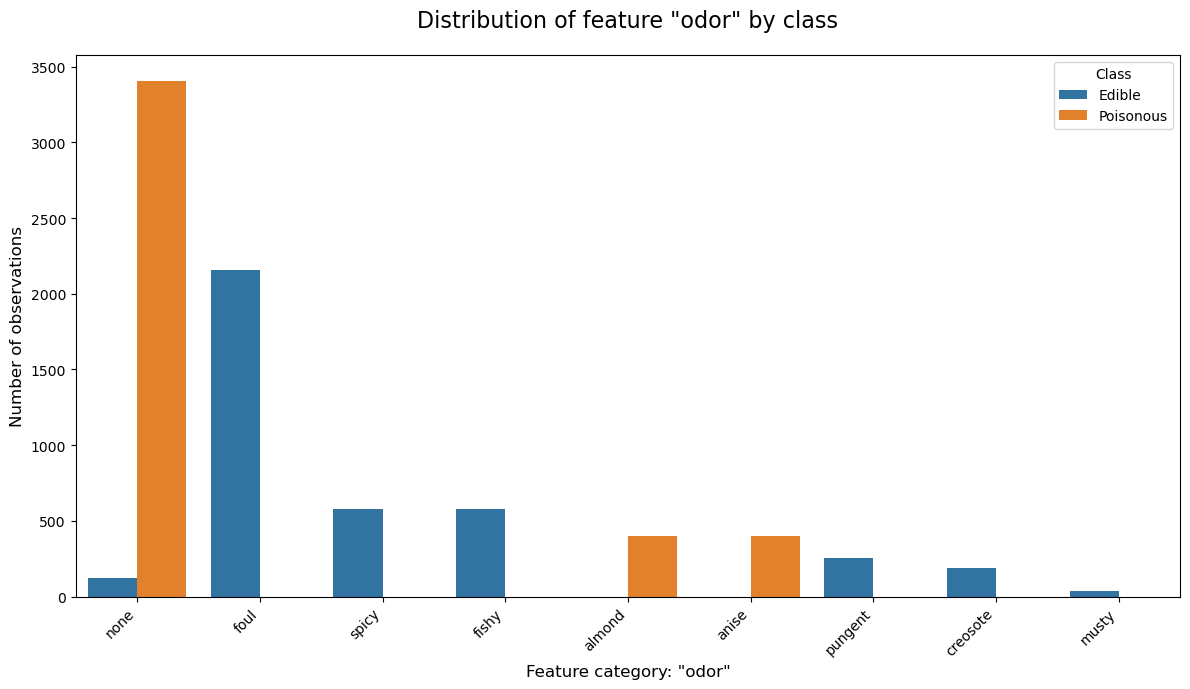

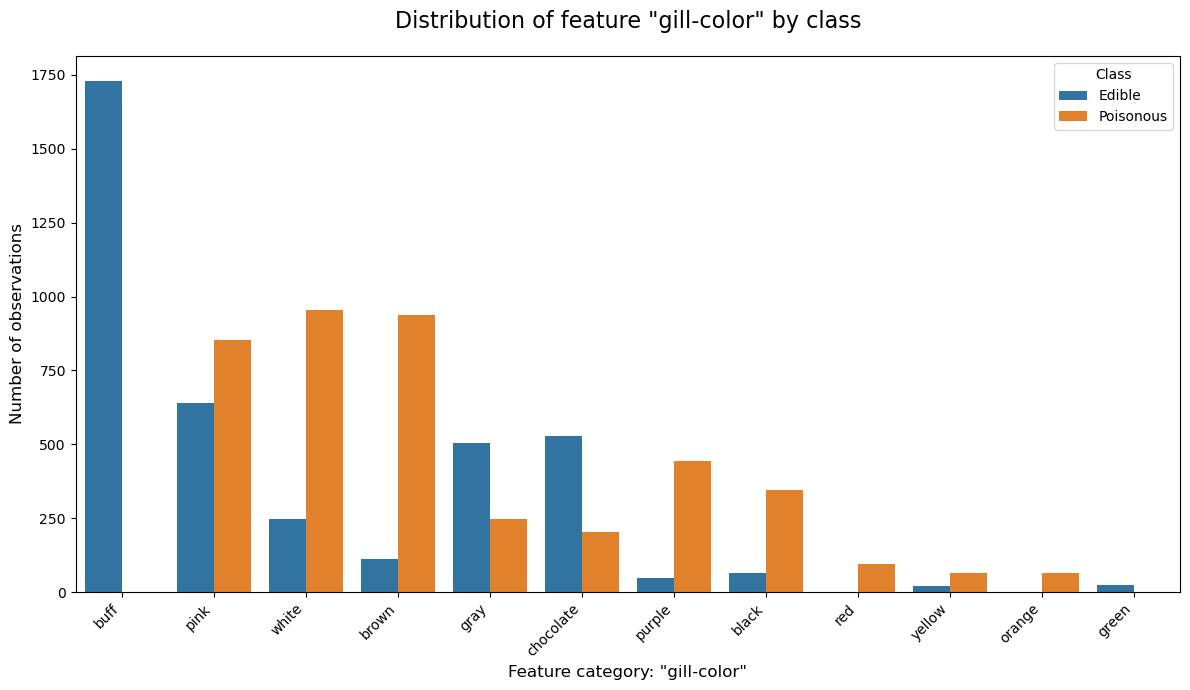

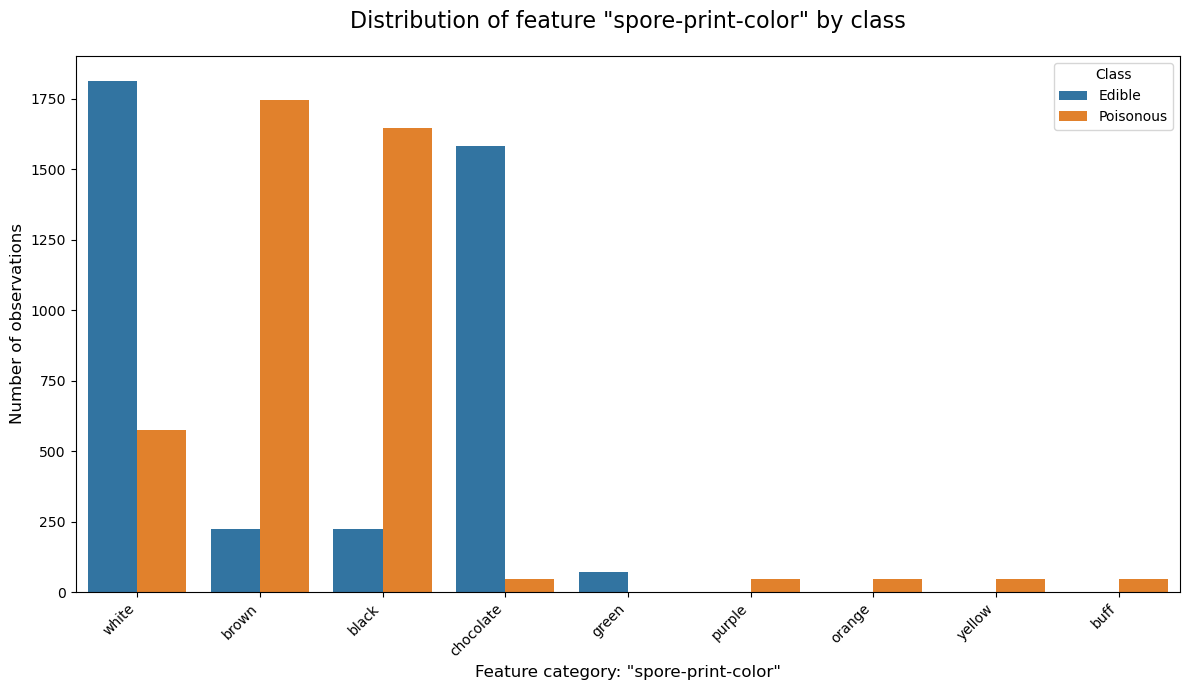


Cramér’s V scores for all features vs. class:


,Feature,Cramér's V
4,odor,0.971005
19,spore-print-color,0.752645
8,gill-color,0.680830
18,ring-type,0.603271
11,stalk-surface-above-ring,0.587944
12,stalk-surface-below-ring,0.574837
7,gill-size,0.539758
13,stalk-color-above-ring,0.524850
14,stalk-color-below-ring,0.514725
3,bruises,0.501280



Top 10 features most strongly associated with class:


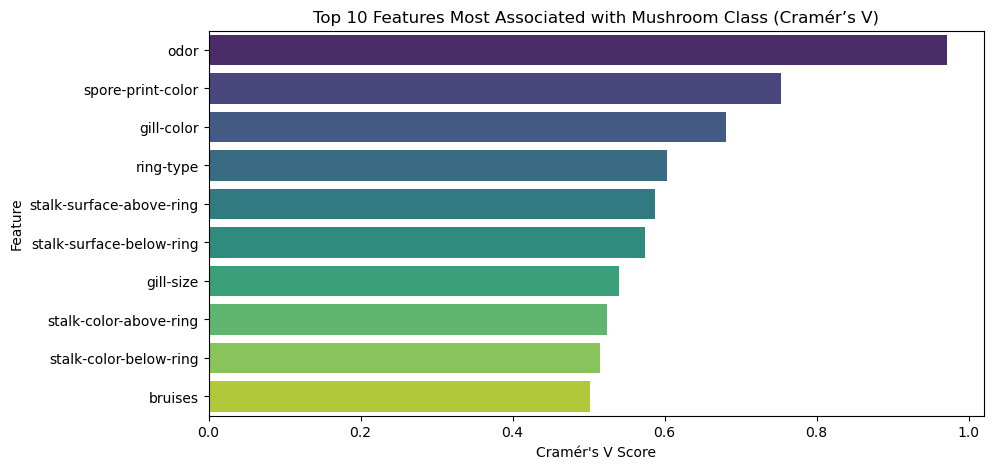

In [6]:
# Mapping for human-readable category names
class_map = {'e': 'Edible', 'p': 'Poisonous'}
cap_shape_map = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul',
    'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}
gill_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
    'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red',
    'w': 'white', 'y': 'yellow'
}
spore_print_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green',
    'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

# Copy DataFrame and apply readable labels
df_readable = df.copy()
df_readable['class'] = df_readable['class'].map(class_map)
df_readable['cap-shape'] = df_readable['cap-shape'].map(cap_shape_map)
df_readable['odor'] = df_readable['odor'].map(odor_map)
df_readable['gill-color'] = df_readable['gill-color'].map(gill_color_map)
df_readable['spore-print-color'] = df_readable['spore-print-color'].map(spore_print_color_map)

print("Created 'df_readable' DataFrame with human-readable category names.")
print("Sample of mapped data:")
display(df_readable[['class', 'odor', 'gill-color', 'spore-print-color', 'cap-shape']].head())

# Visualize selected features against class
features_to_plot = ['odor', 'gill-color', 'spore-print-color']

for feature in features_to_plot:
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(data=df_readable, x=feature, hue='class', order=df_readable[feature].value_counts().index)

    plt.title(f'Distribution of feature "{feature}" by class', fontsize=16, pad=20)
    plt.xlabel(f'Feature category: "{feature}"', fontsize=12)
    plt.ylabel('Number of observations', fontsize=12)

    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['Edible', 'Poisonous'], title='Class')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cramér's V calculation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    if min(r, k) <= 1:
        return 0.0
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér's V for all features vs. class
cramers_results = []
for col in df.columns[1:]:
    confusion_matrix = pd.crosstab(df[col], df['class'])
    v = cramers_v(confusion_matrix.values)
    cramers_results.append((col, v))

cramer_df = pd.DataFrame(cramers_results, columns=['Feature', "Cramér's V"]).sort_values("Cramér's V", ascending=False)
print("\nCramér’s V scores for all features vs. class:")
display(cramer_df)

# Visualize top 10 features by Cramér’s V
print("\nTop 10 features most strongly associated with class:")
plt.figure(figsize=(10, 5))
sns.barplot(data=cramer_df.head(10), x="Cramér's V", y="Feature", palette='viridis', hue='Feature')
plt.title("Top 10 Features Most Associated with Mushroom Class (Cramér’s V)")
plt.xlabel("Cramér's V Score")
plt.ylabel("Feature")
plt.show()


### 3: Data Preparation 

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['class'])
y_raw = df['class']

# Remove uninformative 'veil-type' column
if 'veil-type' in X.columns:
    X = X.drop(columns=['veil-type'])
    print("Column 'veil-type' has been removed from the feature set X.")

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)
print(f"Encoded target variable: {label_encoder.classes_} -> {label_encoder.transform(label_encoder.classes_)}")
print("-" * 50)

# --- Path 1: One-Hot Encoding ---
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X)
print(f"Shape of data after One-Hot Encoding: {X_onehot.shape}")

# --- Path 2: Ordinal Encoding (for CategoricalNB) ---
ordinal_encoder = OrdinalEncoder()
X_ordinal = ordinal_encoder.fit_transform(X)
print(f"Shape of data after Ordinal Encoding: {X_ordinal.shape}")
print("-" * 50)

# Split all datasets into training and testing sets
X_onehot_train, X_onehot_test, \
X_ordinal_train, X_ordinal_test, \
y_train, y_test = train_test_split(
    X_onehot, X_ordinal, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data has been split into training and test sets for both encoding paths.")
print(f"X_onehot_train shape: {X_onehot_train.shape}")
print(f"X_ordinal_train shape: {X_ordinal_train.shape}")
print(f"y_train shape: {y_train.shape}")


Column 'veil-type' has been removed from features X.
Encoded target classes: ['e' 'p'] -> [0 1]
------------------------------
Training set X shape: (6499, 116)
Test set X shape:     (1625, 116)
Training set y shape: (6499,)
Test set y shape:     (1625,)

Sample of encoded features:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
